In [1]:
import pipeline
import pandas as pd
import sherpa
from importlib import reload

import src.models.model_hypopt as model_hypopt

reload(pipeline)

<module 'pipeline' from 'C:\\Users\\User Ambev\\Desktop\\MyPackages\\fastai-flow\\pipeline\\__init__.py'>

In [2]:
TEST_PATH = r'C:\Users\User Ambev\Desktop\Célula de analytics\Projetos\iva-classifier\data\external\sample.csv'
PATH = r'C:\Users\User Ambev\Desktop\Célula de analytics\Projetos\iva-classifier\data\external\history_2020_07.csv'
data = pd.read_csv(PATH)

# Hyperparameter tunning example

## feature selection

In [60]:
#set static parameters
fs_static_params = {
    'num_features':[],
    'fastai_bs':512,
    'model_id':'teste',
    'dependent_vars':['IVAMIRO'],
    'train_frac_split':0.8,
    'date_col':'DatadoDocumento',
    'fastai_cycles':6
}
features = [
    'PEP',
    'Filial',
    'Material',
    'UF',
    'TpImposto',
    'UFUnd',
    'OrgC',
    'tipo_documento',
    'GCm',
    'Fornecedor',
    'IVAPC'
]

#create feature selection study
fs_study = model_hypopt.run_study(
    max_iter = 50,
    pipeline_class = ClassificationPipeline,
    data = data[data['OrgC'] != 'BR00'].sample(100000), #perform study on subset of data
    algorithm = 'bayes',
    static_params = fs_static_params,
    categorical_features_selection = features, # set of features to be selected
    optimizer_params = {'max_num_trials':None, 'verbosity': True},
)


[<sherpa.core.Choice object at 0x000001E13F9F1348>, <sherpa.core.Choice object at 0x000001E11E102E08>, <sherpa.core.Choice object at 0x000001E11E61EE48>, <sherpa.core.Choice object at 0x000001E11E7E8C48>, <sherpa.core.Choice object at 0x000001E11E7E8A08>, <sherpa.core.Choice object at 0x000001E11E7E8108>, <sherpa.core.Choice object at 0x000001E11E9107C8>, <sherpa.core.Choice object at 0x000001E121232B48>, <sherpa.core.Choice object at 0x000001E121232948>, <sherpa.core.Choice object at 0x000001E121232208>, <sherpa.core.Choice object at 0x000001E12135C448>, <sherpa.core.Discrete object at 0x000001E1075E8388>, <sherpa.core.Discrete object at 0x000001E12140E608>, <sherpa.core.Discrete object at 0x000001E1215A3708>, <sherpa.core.Discrete object at 0x000001E1220749C8>, <sherpa.core.Discrete object at 0x000001E122A91408>, <sherpa.core.Discrete object at 0x000001E107BEC288>, <sherpa.core.Discrete object at 0x000001E107BEC208>, <sherpa.core.Discrete object at 0x000001E107BECA48>, <sherpa.core.D

dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-04T00:00:00.000000000
train size: 80.0%
validation size: 9.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
100.0% of validation set kept


PEP,Filial,Material,UFUnd,OrgC,Fornecedor,target
K,BR22,#na#,RS,BR02,313244.0,SH
#na#,BR08,2.00005e+07,PI,BR03,368303.0,D5
K,BR4N,#na#,AC,BR09,365365.0,SH
K,BR2U,#na#,RS,BR02,400202.0,SH
K,BR6D,5.03246e+07,SP,BR03,323527.0,CD


epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [165]:
fs_study.results.sort_values(by = 'Objective', ascending = False).iloc[:5]

,Trial-ID,Status,Iteration,Filial__EMBEDDING_SIZE,Filial__USE_FEATURE_CATEGORICAL,Fornecedor__EMBEDDING_SIZE,Fornecedor__USE_FEATURE_CATEGORICAL,GCm__EMBEDDING_SIZE,GCm__USE_FEATURE_CATEGORICAL,IVAPC__EMBEDDING_SIZE,...,TpImposto__EMBEDDING_SIZE,TpImposto__USE_FEATURE_CATEGORICAL,UFUnd__EMBEDDING_SIZE,UFUnd__USE_FEATURE_CATEGORICAL,UF__EMBEDDING_SIZE,UF__USE_FEATURE_CATEGORICAL,tipo_documento__EMBEDDING_SIZE,tipo_documento__USE_FEATURE_CATEGORICAL,Objective,loss
12,13,INTERMEDIATE,12,26,False,4,True,3,False,8,...,4,True,8,True,1,False,5,False,0.895012,0.369590
4,5,INTERMEDIATE,4,4,False,22,True,22,True,9,...,4,False,2,False,15,False,6,False,0.890685,0.339701
26,27,INTERMEDIATE,26,1,True,102,True,7,False,13,...,3,True,9,False,3,True,5,False,0.887497,0.365226
46,47,INTERMEDIATE,46,2,False,100,True,8,False,11,...,1,True,6,False,15,True,6,True,0.883853,0.354000
42,43,INTERMEDIATE,42,3,True,166,True,5,False,6,...,1,False,6,True,10,True,1,False,0.868595,0.422068


In [121]:
cols_msk = [i for i in fs_study.results.columns if 'EMBED' in i]
fs_study.results.loc[4,cols_msk].sort_values()

OrgC__EMBEDDING_SIZE                2
PEP__EMBEDDING_SIZE                 2
UFUnd__EMBEDDING_SIZE               2
Filial__EMBEDDING_SIZE              4
TpImposto__EMBEDDING_SIZE           4
tipo_documento__EMBEDDING_SIZE      6
IVAPC__EMBEDDING_SIZE               9
UF__EMBEDDING_SIZE                 15
Fornecedor__EMBEDDING_SIZE         22
GCm__EMBEDDING_SIZE                22
Material__EMBEDDING_SIZE          169
Name: 4, dtype: object

# Hyperparemeter tunning

In [3]:
#set static parameters
ht_static_params = {
    'num_features':[],
    'cat_features':['Fornecedor','GCm','IVAPC','OrgC'], # values learned in features selection phase
    'emb_szs':{'Fornecedor':22,'GCm':22,'IVAPC':9,'OrgC':2},# values learned in features selection phase
     #'fastai_bs':512,
    'model_id':'teste',
    'dependent_vars':['IVAMIRO'],
    'train_frac_split':0.8,
    'date_col':'DatadoDocumento',
    'fastai_cycles':6
}

discrete_param_bounds = [{'name':'fastai_bs','range':[64,512], 'scale':'log'}]
continuous_param_bounds = [{'name':'fastai_lr','range':[1e-4,1e-1],'scale':'log'},{'name':'fastai_lr','range':[1e-4,1e-1],'scale':'log'}]
choice_param_bounds = []

layer_setup = {'n_layers':[0,3],'max_layer_size':[8,128],'layer_shrinkage_factor':[0.3,0.8]}

ht_study = model_hypopt.run_study(
    max_iter = 50,
    pipeline_class = ClassificationPipeline,
    data = data[data['OrgC'] != 'BR00'].sample(100000),
    algorithm = 'bayes',
    static_params = ht_static_params,    
    #optimizer_params = {'max_num_trials':None, 'verbosity': True},
    layer_setup = layer_setup,
    continuous_param_bounds = continuous_param_bounds,
    discrete_param_bounds = discrete_param_bounds
)


[<sherpa.core.Discrete object at 0x00000133F57D2948>, <sherpa.core.Discrete object at 0x00000133F57D2CC8>, <sherpa.core.Continuous object at 0x00000133F57D2D08>, <sherpa.core.Discrete object at 0x00000133F57D2D88>, <sherpa.core.Continuous object at 0x00000133F57D2DC8>]


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
304954.0,E10,D5,BR03,D5
301479.0,P07,I9,BR03,I9
302256.0,F16,S1,BR02,SH
321022.0,D13,SH,BR09,SH
398041.0,B43,CD,BR03,CD


epoch,train_loss,valid_loss,accuracy,time
0,1.071067,0.585480,0.857045,00:06
1,0.427281,0.337989,0.893700,00:06
2,0.270238,0.318326,0.890493,00:06
3,0.208718,0.300019,0.892554,00:06
4,0.171239,0.318983,0.897136,00:06
5,0.146970,0.332901,0.896678,00:06


INFO:numexpr.utils:NumExpr defaulting to 8 threads.


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
380060.0,B10,SH,BR02,S1
390152.0,E10,C1,BR03,C1
377461.0,B10,CD,BR03,CD
303776.0,G10,I7,BR03,I7
386415.0,B59,I0,BR03,I0


epoch,train_loss,valid_loss,accuracy,time
0,1.699861,0.599955,0.882245,00:06
1,0.580709,0.317328,0.883161,00:06
2,0.304458,0.300727,0.896220,00:06
3,0.213894,0.282363,0.895533,00:06
4,0.174016,0.301922,0.897595,00:06
5,0.151544,0.303910,0.897136,00:06


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
306600.0,N11,SH,BR02,S1
412432.0,K10,SH,BR02,S1
310937.0,D13,SH,BR09,SH
321022.0,D13,SH,BR09,SH
311612.0,B21,Z4,BR01,Z4


epoch,train_loss,valid_loss,accuracy,time
0,1.417882,0.409311,0.890951,00:06
1,0.500383,0.358296,0.886827,00:06
2,0.278924,0.341549,0.890493,00:06
3,0.202845,0.319993,0.903093,00:06
4,0.167552,0.337241,0.894616,00:06
5,0.143849,0.340060,0.895762,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
394598.0,B43,CD,BR03,CD
300528.0,B33,SH,BR02,SH
417791.0,D13,SH,BR02,S1
406519.0,M20,SH,BR02,S1
304954.0,E10,D5,BR03,D5


epoch,train_loss,valid_loss,accuracy,time
0,0.535330,0.497690,0.859794,00:07
1,0.322797,0.364916,0.875601,00:07
2,0.253793,0.369032,0.858877,00:07
3,0.204470,0.349048,0.899656,00:07
4,0.168364,0.396239,0.893929,00:07
5,0.141626,0.392982,0.896220,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
307115.0,B10,SH,BR02,S1
316872.0,D13,SH,BR09,SH
398041.0,B43,CD,BR03,CD
316153.0,B43,I6,BR03,I6
369694.0,D13,SH,BR09,SH


epoch,train_loss,valid_loss,accuracy,time
0,1.133666,0.429638,0.859107,00:06
1,0.441106,0.361380,0.883849,00:06
2,0.268943,0.350063,0.886827,00:06
3,0.206101,0.314716,0.896220,00:06
4,0.171310,0.355700,0.895762,00:06
5,0.145599,0.347828,0.897824,00:06


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
379813.0,B43,CD,BR03,CD
378612.0,B43,SH,BR02,S1
306600.0,F16,SH,BR02,SH
303139.0,E10,S1,BR02,SH
416098.0,F07,SH,BR02,SH


epoch,train_loss,valid_loss,accuracy,time
0,0.857313,0.557315,0.854983,00:06
1,0.387650,0.468285,0.860023,00:06
2,0.259233,0.415406,0.870790,00:06
3,0.203032,0.471714,0.867354,00:06
4,0.169115,0.400826,0.871019,00:06
5,0.144772,0.421344,0.871249,00:06


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
384565.0,D13,SH,BR09,SH
320289.0,D13,SH,BR02,SH
404961.0,E10,SH,BR02,SH
318103.0,D13,SH,BR02,SH
395690.0,E10,C7,BR03,C7


epoch,train_loss,valid_loss,accuracy,time
0,0.780646,0.346557,0.895533,00:07
1,0.381691,0.476557,0.879954,00:07
2,0.254982,0.344510,0.866438,00:07
3,0.201463,0.359001,0.895991,00:07


Epoch 4: early stopping


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
408527.0,G10,SH,BR02,S1
400565.0,F19,SH,BR02,SH
411325.0,B43,SH,BR02,S1
384873.0,D13,SH,BR09,SH
376499.0,D13,SH,BR09,SH


epoch,train_loss,valid_loss,accuracy,time
0,0.566045,0.434635,0.842841,00:07
1,0.331959,0.333918,0.884307,00:07
2,0.251127,0.331502,0.889118,00:06
3,0.202476,0.297906,0.890034,00:06
4,0.167141,0.310732,0.899885,00:07
5,0.140749,0.321854,0.898969,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
309989.0,B10,CD,BR03,CD
403103.0,B43,CD,BR03,CD
317938.0,B43,ZB,BR03,Z1
379737.0,D13,SH,BR02,SH
329197.0,D13,SH,BR02,S1


epoch,train_loss,valid_loss,accuracy,time
0,0.942621,0.404483,0.867583,00:06
1,0.402960,0.321939,0.888889,00:06
2,0.263151,0.394059,0.871249,00:06
3,0.205889,0.380855,0.869187,00:06
4,0.172103,0.377822,0.875830,00:06


Epoch 5: early stopping


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
413681.0,S20,SH,BR02,S1
315871.0,E10,C3,BR03,C3
318681.0,E10,C1,BR03,C1
414853.0,S20,SH,BR02,S1
317127.0,D13,SH,BR09,SH


epoch,train_loss,valid_loss,accuracy,time
0,0.571821,0.300511,0.896220,00:07
1,0.330952,0.392709,0.883391,00:07
2,0.248454,0.473932,0.883849,00:06
3,0.201511,0.356295,0.899198,00:06
4,0.169091,0.381474,0.895304,00:06
5,0.144575,0.386230,0.899427,00:06


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
326777.0,D13,SH,BR02,SH
315123.0,D13,SH,BR09,SH
400104.0,D13,SH,BR02,S1
308715.0,E10,D5,BR03,D5
378671.0,B43,SH,BR02,SH


epoch,train_loss,valid_loss,accuracy,time
0,1.013636,0.376678,0.875601,00:06
1,0.417617,0.358317,0.886140,00:06
2,0.264516,0.324472,0.894158,00:06
3,0.204704,0.318504,0.897136,00:06
4,0.171388,0.342301,0.871936,00:06
5,0.146980,0.331909,0.893700,00:06


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
323604.0,K10,S1,BR02,SH
303814.0,E10,D5,BR03,D5
300528.0,B33,SH,BR02,S1
311463.0,E10,C1,BR03,C1
311463.0,E10,C1,BR03,C1


epoch,train_loss,valid_loss,accuracy,time
0,1.364415,0.468599,0.882474,00:07
1,0.503609,0.360288,0.885223,00:07
2,0.299106,0.322450,0.887973,00:07
3,0.223551,0.296391,0.900573,00:07
4,0.183589,0.308919,0.894387,00:06
5,0.158759,0.321625,0.897824,00:06


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
317905.0,D13,SH,BR09,SH
402034.0,E10,C1,BR03,C1
401965.0,D13,S1,BR02,S1
311463.0,E10,C1,BR03,C1
385890.0,K10,SH,BR02,SH


epoch,train_loss,valid_loss,accuracy,time
0,0.857957,0.389150,0.871478,00:06
1,0.383697,0.314318,0.892554,00:06
2,0.250191,0.388700,0.874914,00:06
3,0.199838,0.326795,0.895762,00:06
4,0.166730,0.350624,0.896220,00:06
5,0.143707,0.344147,0.899885,00:06


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
279.0,D13,SH,BR09,SH
380186.0,K10,SH,BR02,SH
391088.0,A07,Z3,BR01,Z3
332650.0,B10,CD,BR03,CD
327590.0,B10,SH,BR02,S1


epoch,train_loss,valid_loss,accuracy,time
0,0.663004,0.381730,0.877663,00:07
1,0.350058,0.345130,0.882016,00:07
2,0.254380,0.364759,0.889576,00:07
3,0.201332,0.323415,0.896907,00:07
4,0.165979,0.340634,0.898282,00:07
5,0.143007,0.345233,0.897365,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
311463.0,E10,C1,BR03,C1
313244.0,B10,S1,BR02,SH
400994.0,B10,SH,BR02,S1
413758.0,B24,Z3,BR01,Z3
371561.0,K10,SH,BR02,S1


epoch,train_loss,valid_loss,accuracy,time
0,0.759176,0.302135,0.893013,00:07
1,0.360105,0.301505,0.893013,00:07
2,0.239160,0.339994,0.897365,00:07
3,0.190597,0.374840,0.893471,00:07
4,0.158836,0.352236,0.901031,00:07
5,0.137557,0.370696,0.898053,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
370234.0,M20,SH,BR14,S1
331317.0,N11,SH,BR02,SH
405210.0,B20,SH,BR02,SH
310937.0,D13,SO,BR09,SO
312166.0,D13,SH,BR09,SH


epoch,train_loss,valid_loss,accuracy,time
0,0.577543,0.525564,0.860252,00:06
1,0.330461,0.440921,0.875830,00:06
2,0.248976,0.352999,0.887514,00:06
3,0.201130,0.397299,0.873769,00:06
4,0.167536,0.361868,0.898511,00:06
5,0.141158,0.396295,0.893471,00:06


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
306142.0,B43,I6,BR03,I6
304576.0,P07,I9,BR03,I9
380109.0,B10,S1,BR02,SH
365355.0,D13,S1,BR02,S1
319129.0,G10,I7,BR03,I7


epoch,train_loss,valid_loss,accuracy,time
0,1.281235,0.473879,0.868499,00:06
1,0.472988,0.396525,0.885911,00:06
2,0.275462,0.327582,0.888660,00:06
3,0.207005,0.319132,0.892096,00:06
4,0.169591,0.308132,0.898282,00:06
5,0.145089,0.328111,0.893929,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
331994.0,D13,S1,BR02,S1
396489.0,M20,SH,BR02,S1
319832.0,B04,IB,BR04,IB
309660.0,F16,SH,BR02,SH
400201.0,D13,SH,BR02,SH


epoch,train_loss,valid_loss,accuracy,time
0,1.078123,0.364139,0.887285,00:07
1,0.423262,0.364065,0.885452,00:06
2,0.261747,0.354563,0.885223,00:06
3,0.202540,0.347234,0.867812,00:06
4,0.171147,0.345014,0.892554,00:06
5,0.145315,0.351875,0.894616,00:06


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
403386.0,D13,SH,BR02,S1
307275.0,B10,SH,BR02,S1
320453.0,F16,SH,BR02,SH
378662.0,Y07,SH,BR02,SH
410214.0,B43,SH,BR02,S1


epoch,train_loss,valid_loss,accuracy,time
0,1.026529,0.391789,0.882474,00:07
1,0.419833,0.369723,0.871707,00:07
2,0.266118,0.373560,0.893013,00:07
3,0.206572,0.357939,0.888889,00:07
4,0.171410,0.383816,0.901947,00:08
5,0.145693,0.387801,0.896678,00:08


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
390152.0,E10,C1,BR03,C1
303238.0,B33,Z3,BR01,Z3
318463.0,E10,I9,BR03,I9
311041.0,B43,CD,BR03,CD
313244.0,K10,S1,BR02,SH


epoch,train_loss,valid_loss,accuracy,time
0,0.798383,0.409207,0.883620,00:08
1,0.374407,0.322615,0.898969,00:09
2,0.252275,0.307655,0.899427,00:09
3,0.198310,0.353534,0.901031,00:08
4,0.165375,0.338679,0.899198,00:08
5,0.143485,0.349361,0.898740,00:08


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
310416.0,P07,C1,BR03,C1
374649.0,D13,S1,BR02,S1
387867.0,B43,CD,BR03,CD
319690.0,E10,C4,BR03,C4
316297.0,F16,X7,BR03,X7


epoch,train_loss,valid_loss,accuracy,time
0,0.922350,0.377698,0.880641,00:07
1,0.401901,0.355184,0.892784,00:07
2,0.263487,0.348595,0.890722,00:07
3,0.207791,0.378629,0.888431,00:07
4,0.174318,0.336828,0.893242,00:07
5,0.148608,0.347126,0.898511,00:06


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
316436.0,D13,SH,BR02,SH
328875.0,E10,C3,BR03,C3
322280.0,K10,SH,BR02,S1
395822.0,B04,IB,BR04,IB
304531.0,F16,SH,BR02,S1


epoch,train_loss,valid_loss,accuracy,time
0,0.686116,0.334680,0.903093,00:07
1,0.363171,0.337443,0.879954,00:07
2,0.260992,0.281506,0.898969,00:07
3,0.210890,0.354606,0.892784,00:08


Epoch 4: early stopping


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
327856.0,Q07,SH,BR02,S1
400104.0,D13,SH,BR02,S1
416854.0,F16,SH,BR02,SH
398564.0,B43,CD,BR03,C1
318681.0,E10,C1,BR03,C1


epoch,train_loss,valid_loss,accuracy,time
0,3.759517,3.840014,0.237342,00:07
1,2.962831,2.451720,0.793356,00:07
2,2.298232,1.994900,0.839863,00:07
3,1.863522,1.742731,0.853150,00:09
4,1.625739,1.641110,0.840092,00:07
5,1.526377,1.635301,0.841237,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
406293.0,F16,SH,BR02,SH
401965.0,D13,S1,BR02,S1
378910.0,D13,SH,BR02,SH
310937.0,D13,SO,BR09,SO
302256.0,K10,S1,BR02,SH


epoch,train_loss,valid_loss,accuracy,time
0,0.577979,0.390377,0.876976,00:08
1,0.338218,0.376334,0.863230,00:08
2,0.248356,0.346250,0.888660,00:08
3,0.199252,0.332614,0.902635,00:08
4,0.163954,0.360802,0.899198,00:08
5,0.140525,0.376720,0.902635,00:08


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
303029.0,P07,I7,BR03,I7
314707.0,D13,SH,BR09,SH
368303.0,E10,D5,BR03,D5
312469.0,B29,Z1,BR01,Z8
401065.0,K10,SH,BR02,S1


epoch,train_loss,valid_loss,accuracy,time
0,0.893337,0.404183,0.890493,00:07
1,0.390641,0.338374,0.887514,00:07
2,0.262533,0.374579,0.891409,00:08
3,0.202676,0.372252,0.893700,00:07
4,0.170922,0.367089,0.893242,00:07
5,0.147776,0.385253,0.891867,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
388966.0,B43,SH,BR02,SH
301479.0,P07,I9,BR03,I9
303258.0,P07,I7,BR03,I7
316480.0,P07,I7,BR03,I7
301479.0,B23,Z3,BR01,Z3


epoch,train_loss,valid_loss,accuracy,time
0,1.556351,0.537868,0.868499,00:07
1,0.583219,0.498161,0.846964,00:07
2,0.329704,0.347324,0.891409,00:07
3,0.242057,0.348579,0.895533,00:07
4,0.196627,0.324434,0.896220,00:08
5,0.169736,0.338757,0.895074,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
388250.0,B44,C1,BR07,C7
378988.0,A10,I7,BR03,I7
325091.0,B42,SH,BR02,S1
368275.0,P07,I7,BR03,I7
333063.0,B43,SH,BR02,S1


epoch,train_loss,valid_loss,accuracy,time
0,2.353872,1.043220,0.898282,00:07
1,0.731045,0.323245,0.894845,00:07
2,0.333904,0.323393,0.895304,00:07
3,0.220648,0.311066,0.894845,00:11


Epoch 4: early stopping


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
383239.0,F07,CD,BR03,CD
387867.0,E10,CD,BR03,CD
387626.0,B33,SH,BR02,SH
323694.0,P07,I7,BR03,I7
301479.0,P07,C3,BR03,C3


epoch,train_loss,valid_loss,accuracy,time
0,1.221829,0.392120,0.887285,00:08
1,0.439637,0.334109,0.873769,00:08
2,0.252260,0.344167,0.872623,00:08
3,0.188662,0.347910,0.876747,00:08


Epoch 4: early stopping


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
379341.0,B44,ZT,BR03,ZB
302935.0,G10,SH,BR02,SH
303258.0,P07,C1,BR03,C1
301479.0,P07,I9,BR03,I9
303029.0,P07,I7,BR03,I7


epoch,train_loss,valid_loss,accuracy,time
0,0.907394,0.348555,0.883161,00:08
1,0.377299,0.318557,0.885682,00:07
2,0.244221,0.322292,0.892096,00:08
3,0.191332,0.333021,0.894387,00:08
4,0.161035,0.324882,0.897136,00:08
5,0.140416,0.332032,0.900344,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
364959.0,B43,CD,BR03,CD
396701.0,K10,SH,BR02,S1
315144.0,D13,SH,BR09,SH
326481.0,E10,I9,BR03,I9
367131.0,D13,SH,BR02,SH


epoch,train_loss,valid_loss,accuracy,time
0,1.288615,0.379405,0.870790,00:07
1,0.466056,0.305467,0.891638,00:07
2,0.270642,0.337068,0.894387,00:08
3,0.202045,0.326085,0.889805,00:09
4,0.168976,0.321596,0.893242,00:08
5,0.144088,0.319696,0.892096,00:08


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
373687.0,E10,D5,BR03,D5
368303.0,E10,CG,BR03,CG
395796.0,D13,SH,BR09,SH
307856.0,B10,SH,BR02,SH
313518.0,D13,SH,BR02,SH


epoch,train_loss,valid_loss,accuracy,time
0,0.791872,0.480342,0.878121,00:08
1,0.375338,0.372673,0.882474,00:10
2,0.259506,0.381857,0.889118,00:08
3,0.206873,0.390559,0.891180,00:08
4,0.169150,0.366714,0.901718,00:08
5,0.144126,0.374073,0.901718,00:08


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
333495.0,B43,I6,BR03,I6
310175.0,B43,CD,BR03,CD
395065.0,B43,CD,BR03,C1
406757.0,B42,SH,BR02,S1
399517.0,F16,S1,BR02,S1


epoch,train_loss,valid_loss,accuracy,time
0,0.931218,0.297252,0.898740,00:08
1,0.379688,0.326302,0.890263,00:08
2,0.241993,0.372134,0.867354,00:08
3,0.186423,0.367659,0.890263,00:08


Epoch 4: early stopping


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
302326.0,P07,I9,BR03,I9
329277.0,G10,I9,BR03,I9
383581.0,X07,C6,BR03,C6
323604.0,D13,SH,BR02,SH
376292.0,B43,CD,BR03,CD


epoch,train_loss,valid_loss,accuracy,time
0,1.289795,0.443185,0.858648,00:08
1,0.476446,0.298334,0.891638,00:08
2,0.267723,0.312083,0.886827,00:08
3,0.198176,0.320104,0.892784,00:08
4,0.165487,0.310834,0.895533,00:07
5,0.144598,0.324414,0.892554,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
317659.0,D13,SH,BR09,SH
400104.0,D13,SH,BR02,S1
302326.0,P07,I7,BR03,I7
402034.0,E10,Z5,BR03,Z5
403883.0,N07,SH,BR02,SH


epoch,train_loss,valid_loss,accuracy,time
0,0.969762,0.361970,0.890263,00:07
1,0.406564,0.528664,0.858648,00:07
2,0.266589,0.370402,0.862543,00:10
3,0.207843,0.339637,0.892325,00:07
4,0.170393,0.382666,0.887973,00:07
5,0.147660,0.370654,0.895074,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
327026.0,D13,S1,BR02,S1
313103.0,D13,SH,BR09,SH
372447.0,E10,C0,BR03,C0
310416.0,I07,C1,BR03,C1
311463.0,E10,C1,BR03,C1


epoch,train_loss,valid_loss,accuracy,time
0,1.935004,0.606516,0.854983,00:07
1,0.654677,0.327905,0.887056,00:08
2,0.337845,0.293078,0.896907,00:07
3,0.236250,0.284605,0.897824,00:07
4,0.191807,0.289087,0.900344,00:07
5,0.165640,0.299526,0.896449,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
401810.0,B43,I6,BR03,I6
396154.0,B43,CD,BR03,CD
301479.0,P07,I9,BR03,I9
380060.0,B10,SH,BR02,S1
380060.0,B10,SH,BR02,S1


epoch,train_loss,valid_loss,accuracy,time
0,1.449202,0.388912,0.878121,00:08
1,0.510713,0.294184,0.894158,00:08
2,0.280792,0.307363,0.893700,00:08
3,0.207727,0.298644,0.895074,00:08
4,0.170120,0.322354,0.892325,00:08
5,0.145671,0.312416,0.898969,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
312166.0,D13,SH,BR02,SH
323996.0,F16,SH,BR02,SH
327843.0,B10,CD,BR03,CD
394776.0,B10,CD,BR03,CD
320008.0,D13,SH,BR09,SH


epoch,train_loss,valid_loss,accuracy,time
0,2.381515,1.244229,0.861398,00:08
1,0.767832,0.334335,0.889576,00:07
2,0.345892,0.339970,0.885682,00:07
3,0.222994,0.341451,0.896678,00:07
4,0.174733,0.347858,0.895762,00:07
5,0.151634,0.349179,0.895533,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
312653.0,D13,SH,BR09,SH
303029.0,P07,I7,BR03,I7
303770.0,G10,I7,BR03,I7
315658.0,D13,SH,BR09,SH
304954.0,E10,D5,BR03,D5


epoch,train_loss,valid_loss,accuracy,time
0,3.656492,3.805898,0.232302,00:07
1,2.873487,2.521212,0.797709,00:07
2,2.208005,1.935919,0.876060,00:07
3,1.735065,1.657053,0.860023,00:07
4,1.458551,1.542180,0.864834,00:07
5,1.342594,1.527161,0.863688,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
317159.0,D13,SH,BR09,SH
364985.0,B10,CD,BR03,CD
321169.0,P07,CD,BR03,CD
411838.0,B43,SH,BR02,S1
327983.0,P07,I9,BR03,I9


epoch,train_loss,valid_loss,accuracy,time
0,1.045427,0.316424,0.888889,00:07
1,0.405975,0.343682,0.888202,00:07
2,0.246652,0.345195,0.892096,00:07
3,0.189399,0.326701,0.896678,00:07
4,0.156572,0.340431,0.899885,00:07
5,0.137631,0.349278,0.901260,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
305189.0,A10,I7,BR03,I7
318114.0,B33,Z1,BR01,Z1
323694.0,P07,C1,BR03,C1
380598.0,M20,SH,BR11,S1
398579.0,E02,SH,BR02,S1


epoch,train_loss,valid_loss,accuracy,time
0,0.950845,0.384540,0.883391,00:08
1,0.428027,0.360103,0.891409,00:08
2,0.283951,0.388835,0.866896,00:09
3,0.222660,0.338177,0.893929,00:08
4,0.181522,0.368116,0.890722,00:08
5,0.153527,0.377983,0.890722,00:08


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
311463.0,B43,CD,BR03,C1
403386.0,D13,SH,BR02,S1
413056.0,B43,CD,BR03,CD
398564.0,G10,I7,BR03,I7
401370.0,B33,Z1,BR01,Z1


epoch,train_loss,valid_loss,accuracy,time
0,1.295267,0.403820,0.882245,00:08
1,0.497716,0.317380,0.890263,00:08
2,0.292809,0.340823,0.886140,00:08
3,0.219097,0.299227,0.895991,00:08
4,0.182850,0.299782,0.900802,00:08
5,0.157624,0.303017,0.900115,00:08


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
415224.0,B44,CG,BR03,CD
315636.0,B10,SH,BR02,S1
327698.0,B43,CD,BR03,CD
314756.0,B12,Z3,BR01,Z3
301463.0,P07,I9,BR03,I9


epoch,train_loss,valid_loss,accuracy,time
0,1.040670,0.278777,0.899885,00:08
1,0.403407,0.380200,0.875830,00:08
2,0.248238,0.334566,0.894158,00:08
3,0.188731,0.346661,0.896220,00:09


Epoch 4: early stopping


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
303007.0,B33,Z3,BR01,Z3
368303.0,E10,C1,BR03,C1
303029.0,P07,I7,BR03,I7
305189.0,A10,I7,BR03,I7
403726.0,B30,SH,BR02,S1


epoch,train_loss,valid_loss,accuracy,time
0,0.520370,0.360451,0.874227,00:08
1,0.323156,0.458369,0.882016,00:08
2,0.252020,0.477752,0.890034,00:07
3,0.202243,0.420984,0.896907,00:08
4,0.166301,0.460282,0.897136,00:08
5,0.143159,0.434111,0.898053,00:09


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
304954.0,E10,D5,BR03,D5
302326.0,P07,I9,BR03,I9
368303.0,E10,D5,BR03,D5
304954.0,E10,C1,BR03,C1
308715.0,E10,D5,BR03,D5


epoch,train_loss,valid_loss,accuracy,time
0,1.532681,0.455707,0.881100,00:08
1,0.520649,0.334806,0.866438,00:08
2,0.281084,0.359193,0.875372,00:08
3,0.204566,0.323009,0.878350,00:10
4,0.170527,0.321375,0.895762,00:07
5,0.146836,0.350385,0.877663,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
399022.0,E10,C3,BR03,C3
305865.0,Q07,CD,BR03,CD
402034.0,E10,CD,BR03,CD
311612.0,B21,Z3,BR01,Z3
319129.0,G10,Z5,BR03,Z1


epoch,train_loss,valid_loss,accuracy,time
0,0.938474,0.405466,0.868958,00:08
1,0.412958,0.338498,0.885682,00:07
2,0.271462,0.335256,0.894158,00:07
3,0.215182,0.322142,0.891180,00:08
4,0.175854,0.311563,0.897136,00:07
5,0.151600,0.319800,0.902864,00:08


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
310937.0,D13,SH,BR09,SH
310937.0,D13,SO,BR09,SO
303333.0,B43,C0,BR03,C0
326969.0,F16,U2,BR03,U2
329699.0,P07,I0,BR03,I0


epoch,train_loss,valid_loss,accuracy,time
0,0.748760,0.346289,0.890951,00:09
1,0.364214,0.341774,0.888889,00:08
2,0.247529,0.469320,0.855212,00:08
3,0.197753,0.400844,0.889805,00:07
4,0.166002,0.364867,0.901260,00:08
5,0.142996,0.363066,0.899656,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
327153.0,D13,SH,BR02,S1
312231.0,B43,C1,BR03,C1
325694.0,B10,SH,BR02,SH
404155.0,F16,U2,BR03,QO
303029.0,P07,I7,BR03,I7


epoch,train_loss,valid_loss,accuracy,time
0,0.586713,0.330213,0.886598,00:08
1,0.339598,0.465476,0.887056,00:08
2,0.248902,0.331848,0.895074,00:08
3,0.199865,0.387639,0.884078,00:08
4,0.164594,0.417816,0.894616,00:08
5,0.142144,0.421057,0.875830,00:08


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
321022.0,D13,SH,BR09,SH
302326.0,P07,I7,BR03,I7
303029.0,P07,I7,BR03,I7
394507.0,E10,C1,BR03,C1
314707.0,D13,SH,BR09,SH


epoch,train_loss,valid_loss,accuracy,time
0,0.678379,0.295127,0.900573,00:07
1,0.344537,0.547087,0.861627,00:07
2,0.242562,0.449132,0.886827,00:07
3,0.189505,0.442217,0.890951,00:07


Epoch 4: early stopping


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
304954.0,E10,D5,BR03,D5
321924.0,E10,Z8,BR03,Z8
316297.0,F16,X7,BR03,X7
304954.0,E10,D5,BR03,D5
413608.0,B43,I6,BR03,I6


epoch,train_loss,valid_loss,accuracy,time
0,0.643628,0.343384,0.888660,00:08
1,0.343702,0.339186,0.884307,00:07
2,0.258118,0.388314,0.868499,00:08
3,0.201021,0.329105,0.893700,00:07
4,0.168461,0.343284,0.874456,00:08
5,0.144408,0.355403,0.877892,00:07


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
416432.0,B67,SH,BR02,SH
368303.0,E10,C3,BR03,C3
312509.0,D13,SH,BR02,SH
406331.0,D13,SH,BR02,S1
322777.0,F16,CD,BR03,CD


epoch,train_loss,valid_loss,accuracy,time
0,1.413591,0.412011,0.891867,00:07
1,0.476949,0.394131,0.861168,00:07
2,0.265103,0.326190,0.886827,00:07
3,0.191720,0.377566,0.863459,00:07


Epoch 4: early stopping


dropping NaNs...
Splitting data...
2020-05-20T00:00:00.000000000
2020-03-02T00:00:00.000000000
train size: 80.0%
validation size: 10.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
99.98% of validation set kept


Fornecedor,GCm,IVAPC,OrgC,target
303029.0,P07,I7,BR03,I7
417806.0,B43,CD,BR03,CD
368303.0,E10,D5,BR03,D5
327971.0,F16,C1,BR03,C1
368303.0,E10,C1,BR03,C1


epoch,train_loss,valid_loss,accuracy,time
0,0.576286,0.362493,0.901947,00:08
1,0.340556,0.393888,0.866667,00:08
2,0.251225,0.334034,0.890722,00:08
3,0.199615,0.395900,0.869874,00:07


Epoch 4: early stopping


In [22]:
ht_study.results.sort_values(by = 'Objective', ascending = False).iloc[0:5]

,Trial-ID,Status,Iteration,fastai_bs,fastai_lr,layer_shrinkage_factor__LAYER,max_layer_size__LAYER,n_layers__LAYER,Objective,loss
44,45,INTERMEDIATE,44,228,0.073097,0.466890,37,2,0.902864,0.319800
23,24,INTERMEDIATE,23,429,0.051401,0.698307,120,2,0.902635,0.376720
30,31,INTERMEDIATE,30,156,0.095633,0.539008,32,0,0.901718,0.374073
38,39,INTERMEDIATE,38,388,0.018611,0.360752,58,1,0.901260,0.349278
28,29,INTERMEDIATE,28,342,0.029613,0.482209,53,1,0.900344,0.332032


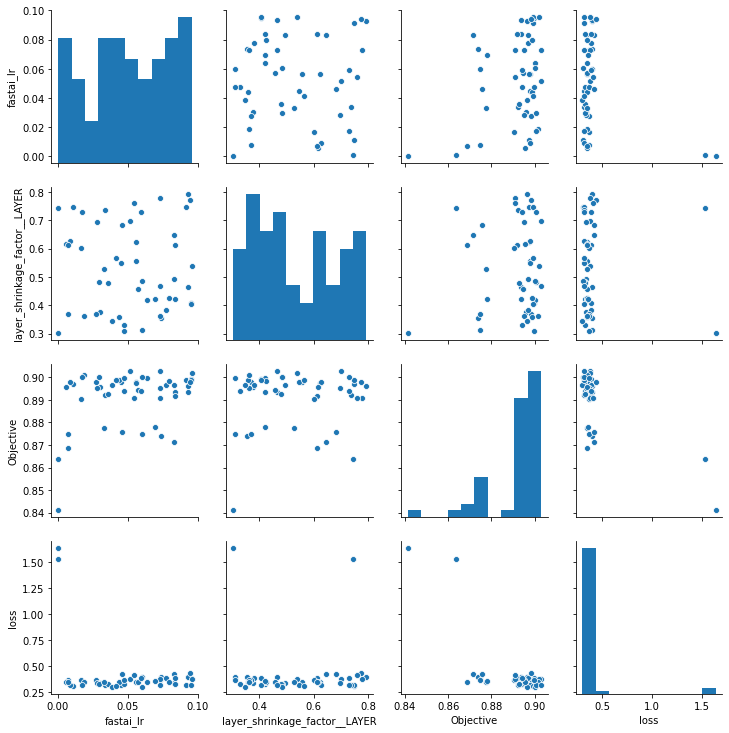

In [21]:
import seaborn as sns
sns.pairplot(ht_study.results.loc[:,ht_study.results.dtypes == float])

# Model trainning example

In [3]:
model_setup = {
    #user defined
    'model_id':'teste1',
    'date_col':'DatadoDocumento',
    'dependent_vars': 'IVAMIRO',
    'cat_features': [
        'PEP',
        'Filial',
        #'Material',
        #'UF',
        'TpImposto',
        'UFUnd',
        'OrgC',
        #'tipo_documento',
        'GCm',
        'Fornecedor',
        'IVAPC'
    ],
    'num_features': [],
    # default
    'train_frac_split':0.8,
    'pd_encoding':'ansi',
    'pd_sep':',',
    'fastai_cycles':4,
    'cat_emb_szs': {
        'IVAPC':10,
        'PEP':3,
        'Fornecedor':1,
        'Filial':16,
        #'Material':10,
        'UF': 8,
        'TpImposto':3,
        'UFUnd':10
    },
    'fastai_bs':256,
    'fastai_lr':0.07,
    'fastai_layers_setup':model_hypopt.fastai_layer_parser(2,228,0.47)
}

In [4]:
model = pipeline.ClassificationPipeline(**model_setup)

## Data prep

In [5]:
import numpy as np
data = pd.read_csv(PATH)
data['DatadoDocumento'] = pd.to_datetime(data['DatadoDocumento'])

test_data = data.sort_values(by = 'DatadoDocumento').iloc[int(0.9*len(data)):]
indiretos_msk = (~data['OrgC'].isin(['BR00']))
#test_data = test_data[msk]

In [17]:
# negative sampling
nan_fornecedor = np.random.binomial(1,0.25 ,size = data.shape[0]).astype(bool)
nan_material = np.random.binomial(1,0.25 ,size = data.shape[0]).astype(bool)
nan_ivapc = np.random.binomial(1,0.5 ,size = data.shape[0]).astype(bool)

#data.loc[nan_fornecedor, 'Fornecedor'] = np.nan
data.loc[nan_ivapc, 'IVAPC'] = np.nan
#data.loc[nan_material, 'Material'] = np.nan
#test_data = pd.read_csv(TEST_PATH)

## Fit model

In [18]:
model.fit(data = data[indiretos_msk].sample(100000), generate_validation_dict = False, metric = 'FBeta', metric_args = {'average':'weighted'})

dropping NaN labels...
Splitting data...
2020-05-22T00:00:00.000000000
2020-03-13T00:00:00.000000000
train size: 81.0%
validation size: 9.0%
test size: 10.0%
Dropped classes: ['IVAMIRO']
100.0% of validation set kept


PEP,Filial,TpImposto,UFUnd,OrgC,GCm,Fornecedor,IVAPC,target
K,BRZB,B2,SP,BR03,E10,402034.0,#na#,CD
K,BR6O,B4,SP,BR02,D13,333489.0,#na#,S1
#na#,BR19,B2,SP,BR03,P07,323694.0,#na#,C7
F,BRZA,B4,SP,BR02,J14,367890.0,SH,S1
#na#,BRV9,B2,PR,BR04,B04,319832.0,IB,IB


epoch,train_loss,valid_loss,f_beta,time
0,0.697205,0.676502,0.776228,00:13
1,0.548983,0.583229,0.800560,00:14
2,0.453167,0.509553,0.812137,00:13
3,0.371484,0.510331,0.820670,00:12


In [19]:
model.save('.', 'teste')

# Load fitted pipeline instance

In [20]:
loaded_model = pipeline.ClassificationPipeline.load('teste')

In [21]:
test_data = data[indiretos_msk]
test_data = test_data.sort_values(by = 'DatadoDocumento').iloc[int(0.9*len(test_data)):]
#test_data = test_data[test_data['OrgC'] != 'BR00']
val_dict = loaded_model.validate(data = test_data)

# teste

In [25]:
val_dict['data_df'][['_TRUE_LABEL_PROBA', '_CLASS_PROBA','_GOT_RIGHT','_UNSEEN_CLASS','_CLASS_PREDS','IVAMIRO']]


,_TRUE_LABEL_PROBA,_CLASS_PROBA,_GOT_RIGHT,_UNSEEN_CLASS,_CLASS_PREDS,IVAMIRO
415987,0.873279,0.873279,1,False,S1,S1
415986,NaN,0.968537,0,True,S1,nan
415985,NaN,0.968537,0,True,S1,nan
415984,NaN,0.968537,0,True,S1,nan
415983,NaN,0.999216,0,True,S1,nan
...,...,...,...,...,...,...
1219885,0.981595,0.981595,1,False,C3,C3
1219884,NaN,0.560112,0,True,I9,nan
1219882,NaN,0.997809,0,True,I6,nan
1219775,NaN,0.601879,0,True,I9,nan
